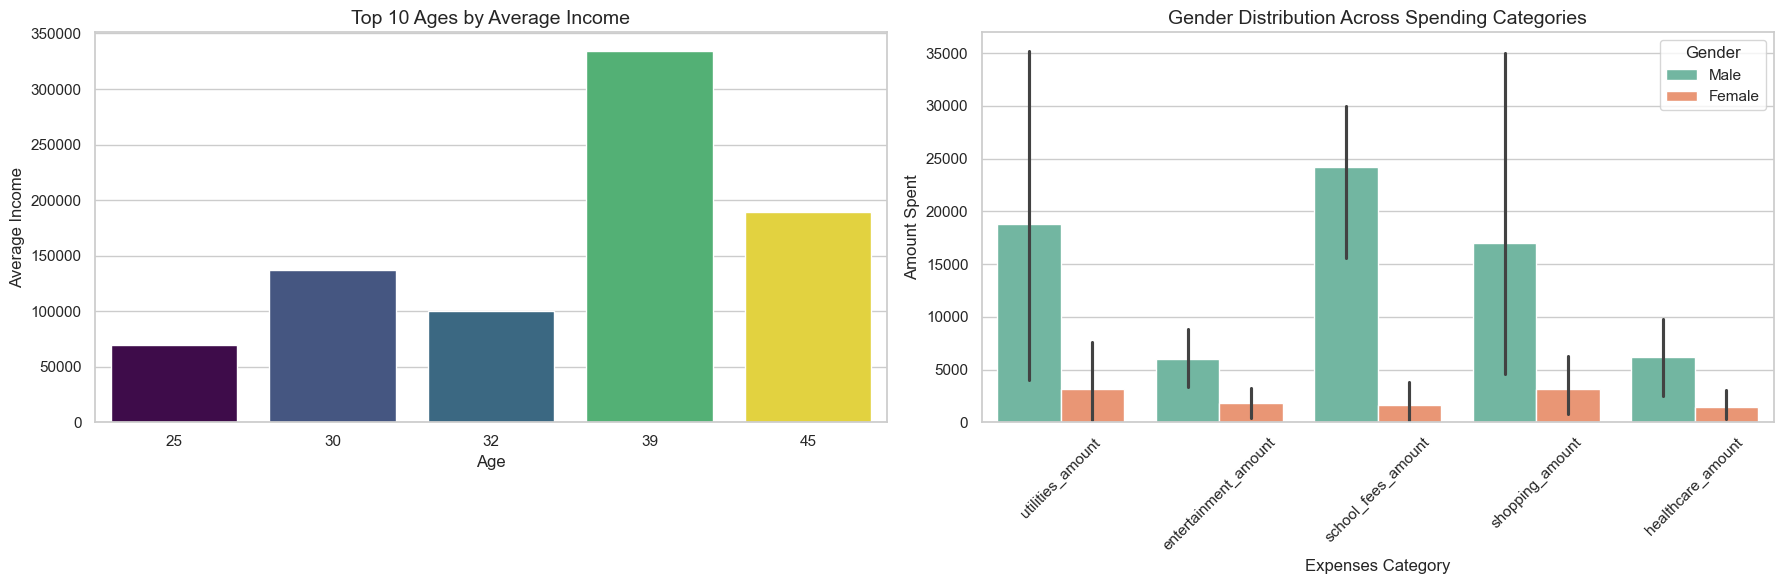

 Dashboard saved to: visualization/combined_finance_dashboard.png


In [2]:
# =====================================
# Finance Dashboard: Income & Spending Analysis
# =====================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load CSV from project structure
df = pd.read_csv("data/user_data.csv")

# Set Seaborn style
sns.set(style="whitegrid")

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18,6))

#--------------------------
# Ages with Highest Average Income
# --------------------------
top_income = (
    df.groupby("age")["total_income"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(
    x=top_income.index,
    y=top_income.values,
    hue=top_income.index,
    palette="viridis",
    legend=False,
    ax=axes[0]
)

axes[0].set_title("Top 10 Ages by Average Income", fontsize=14)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Average Income")

# ---------------------------
# 2. Gender Distribution Across Spending Categories (Right Plot)
# ---------------------------

expense_cols = [
    "utilities_amount",
    "entertainment_amount",
    "school_fees_amount",
    "shopping_amount", 
    "healthcare_amount"
]
    
df_melt = df.melt(
    id_vars="gender",
    value_vars=expense_cols,
    var_name="category",
    value_name="amount"
)

sns.barplot(
    data=df_melt,
    x="category",
    y="amount",
    hue="gender",
    palette="Set2",
    ax=axes[1]
)
axes[1].set_title("Gender Distribution Across Spending Categories", fontsize=14)
axes[1].set_xlabel("Expenses Category")
axes[1].set_ylabel("Amount Spent")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Gender")

# -----------------
# Save and show
# -----------------

plt.tight_layout()

output_path = "visualization/combined_finance_dashboard.png"
plt.savefig(output_path, dpi=300)

plt.show()

print(f" Dashboard saved to: {output_path}")